### Cats and dogs


In [1]:

from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'
# FastAI contains already a set of urls for getting the data and fastdownload.get 


In [4]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
path,get_image_files(path), valid_pct=0.2, seed=42,
label_func=is_cat, item_tfms=Resize(224)
)

In [3]:
print(f"{path}")

/home/celso/.fastai/data/oxford-iiit-pet/images


In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/home/celso/.local/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/celso/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/celso/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/celso/.cache/torch/hub

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time


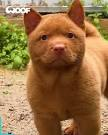

In [22]:
img = PILImage.create('/home/celso/Downloads/animal.jpg')
img.to_thumb(192)

In [23]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat? :{is_cat}")
print(f"Probs that it is a cat? :{probs}")


Is this a cat? :False
Probs that it is a cat? :TensorBase([0.9989, 0.0011])
